# Персонализация предложений интернет-магазина средствами МО

Руководство интернет-магазина "В один клик" поставило перед нашим отделом задачу - разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность. 

Руководитель отдела цифровых технологий уже сформулировал решение:
- Промаркировать уровень финансовой активности постоянных покупателей: «снизилась», если клиент стал покупать меньше товаров, или «прежний уровень».
- Собрать данные по клиентам по следующим группам:
 - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
 - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
 - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
 - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
 
В конечном итоге нам нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца, и, используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Распределение-количественных-признаков" data-toc-modified-id="Распределение-количественных-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Распределение количественных признаков</a></span></li><li><span><a href="#Выборка-клиентов-по-покупательской-активности" data-toc-modified-id="Выборка-клиентов-по-покупательской-активности-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выборка клиентов по покупательской активности</a></span></li></ul></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li></ul></div>

**Описание данных**

1. `market_file.csv` - данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
 - id — номер покупателя в корпоративной базе данных.
 - Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
 - Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
 - Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это  даёт покупатель.
 - Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
 - Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
 - Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
 - Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
 - Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
 - Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
 - Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
 - Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
 - Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


2. `market_money.csv` - данные о выручке, которую получает магазин с покупателя, сколько покупатель всего потратил за период взаимодействия с сайтом.
 - id — номер покупателя в корпоративной базе данных.
 - Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
 - Выручка — сумма выручки за период.


3. `market_time.csv` - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.
 - id — номер покупателя в корпоративной базе данных.
 - Период — название периода, во время которого зафиксировано общее время.
 - минут — значение времени, проведённого на сайте, в минутах.


4. `money.csv` - данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
 - id — номер покупателя в корпоративной базе данных.
 - Прибыль — значение прибыли.

In [1]:
#pip install phik

In [2]:
import pandas as pd # Импорт необходимых библиотек
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

try: # Библиотеки phik нету в окружении практикума по умолчанию. На всякий пожарный использую конструкцию try-except при импорте
    import phik
except:
    phik_loc = False
else:
    phik_loc = True
phik_loc

True

In [3]:
#pd.options.mode.chained_assignment = None # На случай, если пандас будет выпендриваться. Удалить, если не используется
sns.set_style('dark') # Устанавливаем стиль для графиков
RANDOM_STATE = 38 # Константа определения случайных значений

## Загрузка данных

In [4]:
def dataset_info(ds, info=True): # Универсальная функция презентации данных
    print('Количество дубликатов:', ds.duplicated().sum())
    print('Длина датасета:', len(ds))
    display(ds.head())
    if info: 
        ds.info()
        display(ds.describe())

Для начала загрузим данные и ознакомимся с ними.

In [5]:
try: # Проект запускается либо в окружении практикума, либо локально. 
    ds_main = pd.read_csv('/datasets/market_file.csv')
except:
    ds_main = pd.read_csv('datasets/market_file.csv')
dataset_info(ds_main)

Количество дубликатов: 0
Длина датасета: 1300


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Ни одного явного дубликата. Названия столбцов вполне информативны, разве-что привести их к нижнему регистру. Тип сервиса "стандартт" вызывает подозрения, возможно это ошибка заполнения или дубликат значения. Отложим это на этап предобработки. Всем данным уже присвоен соответствующий тип. В целом можно сказать, что данные в хорошем состоянии.

In [6]:
try: 
    ds_money = pd.read_csv('/datasets/market_money.csv')
except:
    ds_money = pd.read_csv('datasets/market_money.csv')
dataset_info(ds_money)

Количество дубликатов: 0
Длина датасета: 3900


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Никаких дубликатов, значения соответствуют ожидаемым. В датасете значительно больше записей, 3900 против 1300 из основного датасета. Это связано с тем, что здесь представлены несколько периодов для каждого айди.

In [7]:
try: 
    ds_time = pd.read_csv('/datasets/market_time.csv')
except:
    ds_time = pd.read_csv('datasets/market_time.csv')
dataset_info(ds_time)

Количество дубликатов: 0
Длина датасета: 2600


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


Похожая ситуация, записей больше из-за нескольких периодов. Видна грамматическая ошибка в значении "предыдцщий_месяц". Запомнили.

In [8]:
try: 
    ds_mean_money = pd.read_csv('/datasets/money.csv', sep=';', decimal=",")
except:
    ds_mean_money = pd.read_csv('datasets/money.csv', sep=';', decimal=",")
dataset_info(ds_mean_money)

Количество дубликатов: 0
Длина датасета: 1300


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


Среднее значение среднемесячной прибыли за последние 3 месяца - 4. Кажется, это не рубли, а как минимум тысячи рублей. Этот момент стоит уточнить у тех, кто составлял данные. Пока будем отталкиваться от предположения, что прибыль указывается в тысячах рублей. В остальном с данными всё в порядке, количество записей совпадает с основным датасетом. На этом можно заканчивать загрузку данных и переходить к следующему этапу.

## Предобработка данных

Для начала - приведём все названия столбцов к нижнему регистру для удобства.

In [9]:
ds_main.columns = ds_main.columns.str.lower()
ds_money.columns = ds_money.columns.str.lower()
ds_time.columns = ds_time.columns.str.lower()
ds_mean_money.columns = ds_mean_money.columns.str.lower()
print(ds_main.columns, ds_money.columns, ds_time.columns, ds_mean_money.columns)

Index(['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object') Index(['id', 'период', 'выручка'], dtype='object') Index(['id', 'период', 'минут'], dtype='object') Index(['id', 'прибыль'], dtype='object')


Теперь пройдёмся по подозрительным значениям, которые нам удалось заметить. Например, тип сервиса "стандартт". На всякий случай посмотрим на уникальные значения всех категориальных столбцов.

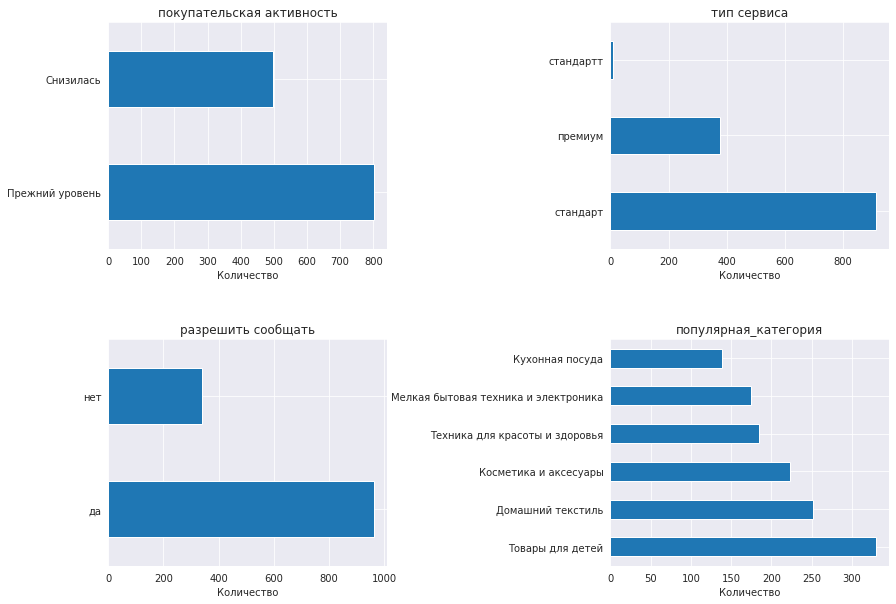

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2)
j=0
for i in ds_main.select_dtypes(exclude='number').columns:
    ds_main[i].value_counts().plot(kind='barh', figsize=(14, 10), ax=axes[j//2, j%2], grid=True)
    axes[j//2, j%2].set_title(i)
    axes[j//2, j%2].set_xlabel('Количество')
    j+=1
plt.subplots_adjust(wspace=0.8, hspace=0.4)
plt.show()

Да, значение "стандартт" - неявный дубликат значения "стандарт". В остальных столбцах неявных дубликатов нет. Заодно можно заметить явный дисбаланс классов целевого признака - гораздо больше клиентов, чья покупательская способность осталась на прежнем уровне.

In [11]:
ds_main.loc[ds_main['тип сервиса'] == 'стандартт', 'тип сервиса'] = 'стандарт'
ds_main['тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Раз-уж заговорили про категориальные параметры - посмотрим на столбцы с периодами из `ds_time` и `ds_money`.

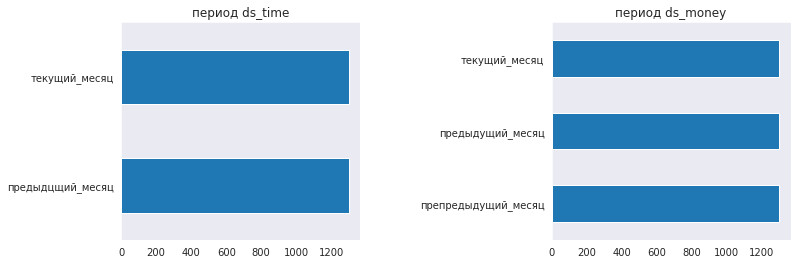

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ds_time['период'].value_counts().plot(kind='barh', figsize=(12, 4), title='период ds_time', ax=axes[0])
ds_money['период'].value_counts().plot(kind='barh', figsize=(12, 4), title='период ds_money', ax=axes[1]);
plt.subplots_adjust(wspace=0.8)

А это уже простая ошибка наименования. Исправим её

In [13]:
ds_time.loc[ds_time['период'] == 'предыдцщий_месяц', 'период'] = 'предыдущий_месяц'
ds_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

И на этом предобработку можно заканчивать. Мы привели названия столбцов к нижнему регистру, избавились от двух неявных дубликатов в данных, а также выявили дисбаланс классов.

## Исследовательский анализ

### Распределение количественных признаков

Для начала проанализируем основной датасет. Распределение категориальных признаков мы уже смотрели при выявлении неявных дубликатов, теперь посмотрим на распределение количественных признаков.

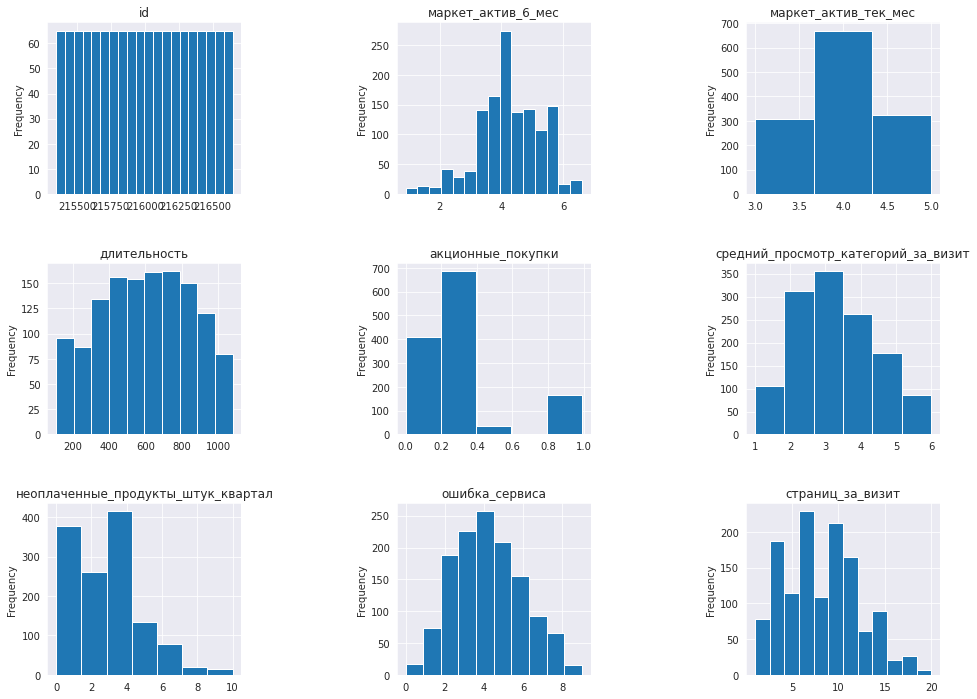

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3)
j=0
bins=[20, 15, 3, 10, 5, 6, 7, 10, 12]
for i in ds_main.select_dtypes(include='number').columns:
    ds_main[i].plot(kind='hist', bins=bins[j], ax=axes[j//3, j%3], figsize=(16, 12), grid=True)
    axes[j//3, j%3].set_title(i)
    j+=1

plt.subplots_adjust(wspace=0.8, hspace=0.4)
plt.show()

`id` распределены равномерно и последовательно, записи в выборку явно выбирались не случайным образом, это может быть как хорошо по причине сравнительно одинаковой свежести данных, так и плохо по причине возможного наличия в выборке закономерностей, которых нету в генеральной совокупности.

Отдел маркетинга не зря получает зарплату - в среднем от 3 до 6 маркетинговых коммуникаций с абсолютным большинством клиентов каждый месяц из числа последних шести, и текущий месяц показывает схожую картину. Отсутствие нулевых значений в текущем месяце выглядит подозрительно, но не невозможно.

Признак `акционные_покупки` показывает, что клиенты разбились на 2 условных лагеря - основной, совершающий от 0 до 40% акционных покупок, и чуть менее крупный, которые совершают исключительно покупки товаров по акции - от 80 до 100%.

`неоплаченные_продукты` перекошены влево, большинство старается оплачивать как можно больше своих покупок.

Все остальные распределения похожи на нормальное.

Теперь взглянем на данные из остальных таблиц.

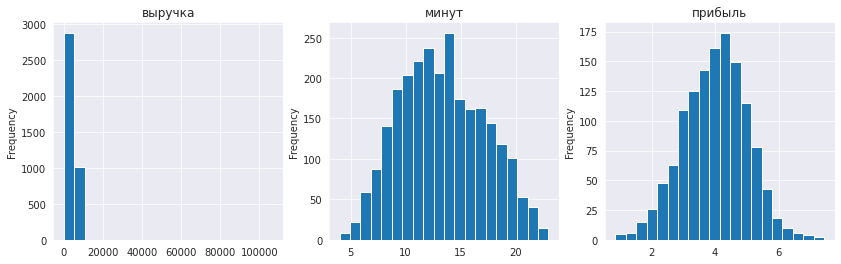

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3)
j=0
for i in [ds_money['выручка'], ds_time['минут'], ds_mean_money['прибыль']]:
    i.plot(kind='hist', bins=20, figsize=(14, 4), ax=axes[j], title=i.name, grid=True)
    j+=1

А вот и первая аномалия. Выручка за один из месяцев свыше 100.000

In [16]:
ds_money[ds_money['выручка']>80000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


Не исключено, что такой клиент действительно существует, но при обучении модели он будет нам мешать.

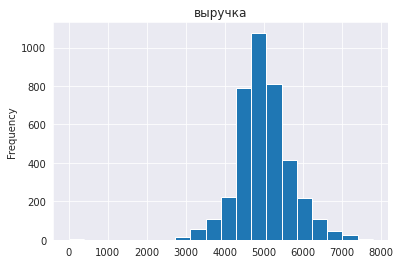

In [17]:
ds_money = ds_money[ds_money['выручка']<100000]
ds_money['выручка'].plot(kind='hist', bins=20, title='выручка', grid=True);

Теперь все распределения выглядят нормально.

### Выборка клиентов по покупательской активности

Теперь найдём клиентов, которые в течение последних трёх месяцев совершали хотя-бы одну покупку каждый месяц. 

In [18]:
ds_money_new = ds_money.set_index('id') # Устанавливаем айди как индекс
for i in ds_money_new['период'].unique(): # Для каждого уникального периода создаётся новый столбец
    ds_money_new[i] = ds_money_new.loc[ds_money_new['период'] == i, 'выручка']
ds_money_new['id'] = ds_money_new.index # Защита от сброса похожих записей. Временно возвращаю айди перед сбросом дубликатов
ds_money_new = ds_money_new.drop(['период', 'выручка'], axis=1).drop_duplicates().replace(0, np.nan).dropna()
ds_money_new = ds_money_new.drop(['id'], axis=1)
ds_money_new.columns = ds_money_new.columns+'_выручка'
dataset_info(ds_money_new, False) # Убираем ненужные столбцы, сбрасываем дубликаты, заменяем нули на nan и сбрасываем пропуски.

Количество дубликатов: 21
Длина датасета: 1296


,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_выручка
id,,,
215349,4472.0,4971.6,5216.0
215350,4826.0,5058.4,5457.5
215351,4793.0,6610.4,6158.0
215352,4594.0,5872.5,5807.5
215353,5124.0,5388.5,4738.5


А вот и действующие клиенты, а заодно и выручка в каждом месяце от них. Дальше на очереди объединение таблиц.

## Объединение таблиц

Данные о выручке уже готовы. Проведём такую-же подготовку для данных с временем посещения сайта

In [19]:
ds_time_new = ds_time.set_index('id') # Всё то-же самое, что и в ячейке выше, но для другой таблицы
for i in ds_time_new['период'].unique():
    ds_time_new[i] = ds_time_new.loc[ds_time_new['период'] == i, 'минут']
ds_time_new['id'] = ds_time_new.index
ds_time_new = ds_time_new.drop(['период', 'минут'], axis=1).drop_duplicates()
ds_time_new = ds_time_new.drop(['id'], axis=1)
ds_time_new = ds_time_new[ds_time_new.index.isin(ds_money_new.index)] # Оставляю только записи, чей айди уже присутствует в ds_money_new
ds_time_new.columns = ds_time_new.columns+'_минут'
dataset_info(ds_time_new, False)

Количество дубликатов: 1018
Длина датасета: 1296


,текущий_месяц_минут,предыдущий_месяц_минут
id,,
215349,10,12
215350,13,8
215351,13,11
215352,11,8
215353,10,10


А теперь - объединим таблицы в одну.

In [20]:
ds_new = ds_main[ds_main['id'].isin(ds_money_new.index)].set_index('id')
ds_new = ds_new.join(ds_money_new).join(ds_time_new)
dataset_info(ds_new, False)

Количество дубликатов: 11
Длина датасета: 1296


,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_выручка,текущий_месяц_минут,предыдущий_месяц_минут
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,5216.0,10,12
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,6158.0,13,11
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,5807.5,11,8
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,4738.5,10,10


Это было быстро(сравнительно). В следующем этапе посмотрим на корреляцию признаков.

## Корреляционный анализ

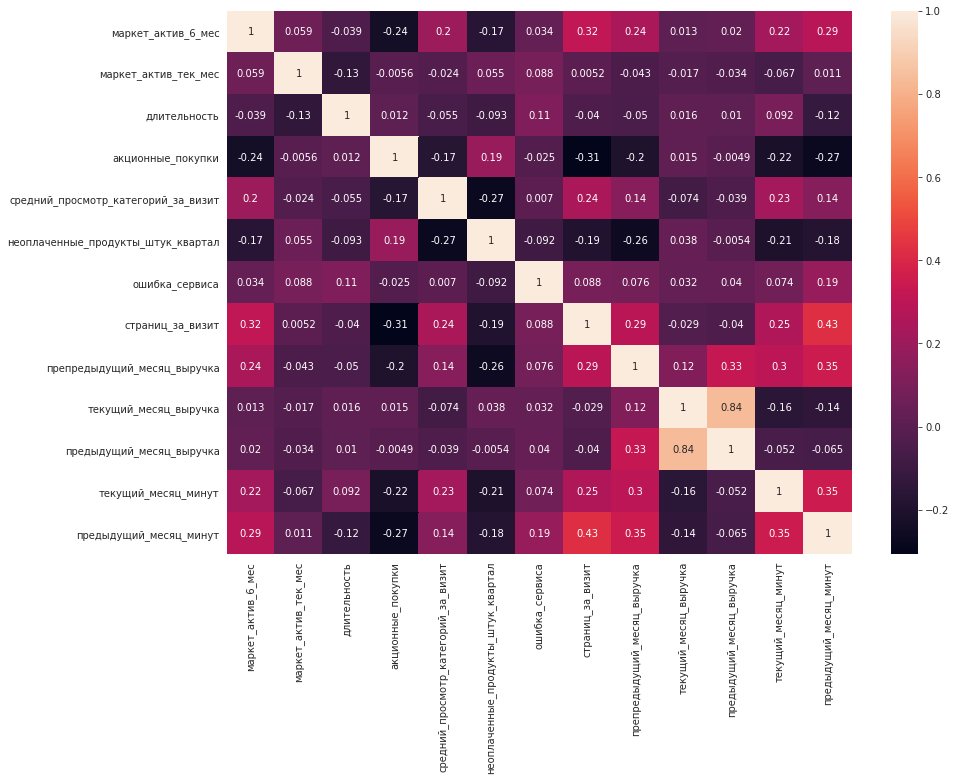

In [21]:
plt.figure(figsize=(14, 10))
sns.heatmap(ds_new.corr(), annot=True);

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка', 'предыдущий_месяц_выручка', 'текущий_месяц_минут', 'предыдущий_месяц_минут']


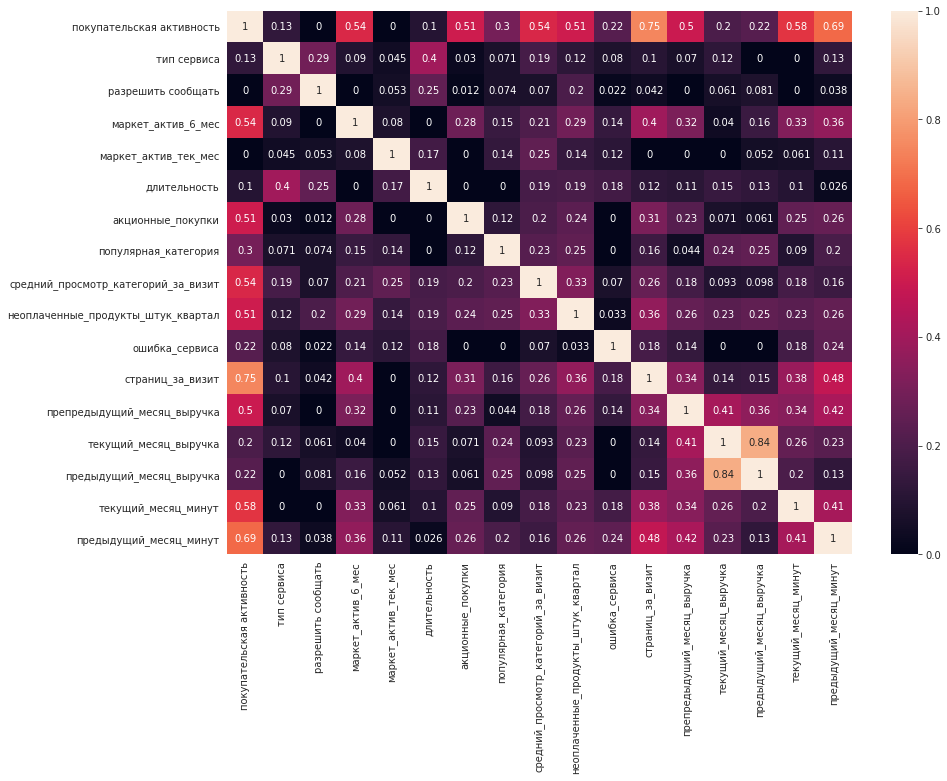

In [22]:
if phik_loc:
    plt.figure(figsize=(14, 10))
    sns.heatmap(ds_new.phik_matrix(), annot=True);
else:
    print('Тут должна была быть матрица корреляции phik, но библиотеку забыли установить')